# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
OPTIZERS = ['SGD','RMSprop','AdaGrad','Adam']



In [12]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for OP in OPTIZERS:
    for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        
        if OP=='SGD':
            optimizer = keras.optimizers.SGD(lr=lr)
        elif OP=='RMSprop':
            optimizer = keras.optimizers.RMSprop(lr=lr)
        elif  OP=='AdaGrad':
            optimizer = keras.optimizers.Adagrad(lr=lr)        
        else: 
            optimizer = keras.optimizers.Adam(lr=lr)
            
        optimizer = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-lr-%s" % str(lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}
    


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 24s 480us/step - loss: 2.1006 - acc: 0.2330 - val_loss: 1.8988 - val_acc: 0.3106
Epoch 2/50
50000/50000 [==============================] - 24s 478us/step - loss: 1.8630 - acc: 0.3240 - val_loss: 1.7966 - val_acc: 0.3566
Epoch 3/50
50000/50000 [==============================] - 24s 479us/step - loss: 1.7659 - acc: 0.3660 - val_loss: 1.7606 - val_acc: 0.3580
Epoch 4/50
50000/50000 [==============================] - 24s 484us/step - loss: 1.7023 - acc: 0.3894 - val_loss: 1.6984 - val_acc: 0.3891
Epoch 5/50
50000/50000 [==============================] - 24s 480us/step - loss: 1.6466 - acc: 0.4119 - val_loss: 1.8931 - val_acc: 0.3223
Epoch 6/50
50000/50000 [==============================] - 24s 480us/step - loss: 1.5997 - acc: 0.4276 - val_loss: 1.5635 - val_acc: 0.4416
Epoch 7/50
50000/50000 [==============================] - 24s 481us/step - loss: 1.5623 - acc: 0.4395 - val_loss: 1.

50000/50000 [==============================] - 24s 480us/step - loss: 2.1124 - acc: 0.2265 - val_loss: 2.0359 - val_acc: 0.2459
Epoch 2/50
50000/50000 [==============================] - 24s 476us/step - loss: 1.8676 - acc: 0.3248 - val_loss: 2.0388 - val_acc: 0.2665
Epoch 3/50
50000/50000 [==============================] - 24s 481us/step - loss: 1.7714 - acc: 0.3656 - val_loss: 1.7910 - val_acc: 0.3551
Epoch 4/50
50000/50000 [==============================] - 26s 511us/step - loss: 1.7042 - acc: 0.3923 - val_loss: 1.6906 - val_acc: 0.3990
Epoch 5/50
50000/50000 [==============================] - 24s 479us/step - loss: 1.6547 - acc: 0.4099 - val_loss: 1.7829 - val_acc: 0.3550
Epoch 6/50
50000/50000 [==============================] - 24s 477us/step - loss: 1.5975 - acc: 0.4297 - val_loss: 2.0255 - val_acc: 0.3056
Epoch 7/50
50000/50000 [==============================] - 24s 477us/step - loss: 1.5656 - acc: 0.4420 - val_loss: 1.6295 - val_acc: 0.4109
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 24s 475us/step - loss: 1.8662 - acc: 0.3239 - val_loss: 1.8261 - val_acc: 0.3256
Epoch 3/50
50000/50000 [==============================] - 25s 490us/step - loss: 1.7717 - acc: 0.3600 - val_loss: 1.8674 - val_acc: 0.3202
Epoch 4/50
50000/50000 [==============================] - 24s 485us/step - loss: 1.7108 - acc: 0.3898 - val_loss: 1.8738 - val_acc: 0.3334
Epoch 5/50
50000/50000 [==============================] - 24s 474us/step - loss: 1.6557 - acc: 0.4093 - val_loss: 1.6699 - val_acc: 0.4089
Epoch 6/50
50000/50000 [==============================] - 24s 474us/step - loss: 1.6065 - acc: 0.4265 - val_loss: 1.6176 - val_acc: 0.4254
Epoch 7/50
50000/50000 [==============================] - 24s 474us/step - loss: 1.5706 - acc: 0.4370 - val_loss: 1.6670 - val_acc: 0.3878
Epoch 8/50
50000/50000 [==============================] - 24s 482us/step - loss: 1.5294 - acc: 0.4550 - val_loss: 1.5755 - val_acc: 0.4378
Epoch 9/50
50000/50000 [===

Epoch 3/50
50000/50000 [==============================] - 24s 481us/step - loss: 1.7618 - acc: 0.3679 - val_loss: 1.7983 - val_acc: 0.3367
Epoch 4/50
50000/50000 [==============================] - 24s 475us/step - loss: 1.6957 - acc: 0.3938 - val_loss: 1.8867 - val_acc: 0.3272
Epoch 5/50
50000/50000 [==============================] - 24s 476us/step - loss: 1.6406 - acc: 0.4118 - val_loss: 1.6536 - val_acc: 0.3986
Epoch 6/50
50000/50000 [==============================] - 24s 475us/step - loss: 1.5973 - acc: 0.4288 - val_loss: 1.7071 - val_acc: 0.3845
Epoch 7/50
50000/50000 [==============================] - 24s 477us/step - loss: 1.5534 - acc: 0.4450 - val_loss: 1.6538 - val_acc: 0.4170
Epoch 8/50
50000/50000 [==============================] - 24s 484us/step - loss: 1.5258 - acc: 0.4567 - val_loss: 1.7099 - val_acc: 0.3935
Epoch 9/50
50000/50000 [==============================] - 24s 480us/step - loss: 1.4894 - acc: 0.4675 - val_loss: 1.6346 - val_acc: 0.4085
Epoch 10/50
50000/50000 [==

Epoch 4/50
50000/50000 [==============================] - 24s 473us/step - loss: 1.7043 - acc: 0.3902 - val_loss: 1.7007 - val_acc: 0.3880
Epoch 5/50
50000/50000 [==============================] - 24s 472us/step - loss: 1.6509 - acc: 0.4096 - val_loss: 1.6823 - val_acc: 0.3977
Epoch 6/50
50000/50000 [==============================] - 24s 473us/step - loss: 1.6058 - acc: 0.4296 - val_loss: 1.6057 - val_acc: 0.4229
Epoch 7/50
50000/50000 [==============================] - 24s 473us/step - loss: 1.5661 - acc: 0.4411 - val_loss: 1.7298 - val_acc: 0.3920
Epoch 8/50
50000/50000 [==============================] - 24s 481us/step - loss: 1.5306 - acc: 0.4540 - val_loss: 1.6408 - val_acc: 0.4162
Epoch 9/50
50000/50000 [==============================] - 24s 480us/step - loss: 1.4994 - acc: 0.4640 - val_loss: 1.6383 - val_acc: 0.4235
Epoch 10/50
50000/50000 [==============================] - 24s 479us/step - loss: 1.4679 - acc: 0.4754 - val_loss: 1.5852 - val_acc: 0.4409
Epoch 11/50
50000/50000 [=

Epoch 5/50
50000/50000 [==============================] - 24s 490us/step - loss: 1.6418 - acc: 0.4145 - val_loss: 1.7521 - val_acc: 0.3815
Epoch 6/50
50000/50000 [==============================] - 24s 480us/step - loss: 1.6114 - acc: 0.4235 - val_loss: 1.7810 - val_acc: 0.3637
Epoch 7/50
50000/50000 [==============================] - 24s 485us/step - loss: 1.5723 - acc: 0.4393 - val_loss: 1.5495 - val_acc: 0.4480
Epoch 8/50
50000/50000 [==============================] - 24s 488us/step - loss: 1.5293 - acc: 0.4529 - val_loss: 1.6287 - val_acc: 0.4241
Epoch 9/50
50000/50000 [==============================] - 25s 491us/step - loss: 1.4981 - acc: 0.4678 - val_loss: 1.7971 - val_acc: 0.3567
Epoch 10/50
50000/50000 [==============================] - 24s 485us/step - loss: 1.4682 - acc: 0.4751 - val_loss: 1.5072 - val_acc: 0.4574
Epoch 11/50
50000/50000 [==============================] - 24s 484us/step - loss: 1.4423 - acc: 0.4864 - val_loss: 1.5456 - val_acc: 0.4503
Epoch 12/50
50000/50000 [

Epoch 6/50
50000/50000 [==============================] - 25s 493us/step - loss: 1.6017 - acc: 0.4270 - val_loss: 1.7774 - val_acc: 0.3613
Epoch 7/50
50000/50000 [==============================] - 24s 482us/step - loss: 1.5650 - acc: 0.4420 - val_loss: 1.6703 - val_acc: 0.4078
Epoch 8/50
50000/50000 [==============================] - 24s 481us/step - loss: 1.5294 - acc: 0.4521 - val_loss: 1.8266 - val_acc: 0.3673
Epoch 9/50
50000/50000 [==============================] - 24s 486us/step - loss: 1.4938 - acc: 0.4684 - val_loss: 1.6981 - val_acc: 0.4101
Epoch 10/50
50000/50000 [==============================] - 24s 486us/step - loss: 1.4708 - acc: 0.4771 - val_loss: 1.5677 - val_acc: 0.4323
Epoch 11/50
50000/50000 [==============================] - 24s 485us/step - loss: 1.4418 - acc: 0.4863 - val_loss: 1.6314 - val_acc: 0.4331
Epoch 12/50
50000/50000 [==============================] - 24s 486us/step - loss: 1.4120 - acc: 0.4969 - val_loss: 1.5574 - val_acc: 0.4447
Epoch 13/50
50000/50000 

Epoch 7/50
50000/50000 [==============================] - 24s 484us/step - loss: 1.5634 - acc: 0.4458 - val_loss: 1.6195 - val_acc: 0.4203
Epoch 8/50
50000/50000 [==============================] - 24s 478us/step - loss: 1.5164 - acc: 0.4591 - val_loss: 1.5879 - val_acc: 0.4334
Epoch 9/50
50000/50000 [==============================] - 24s 481us/step - loss: 1.4891 - acc: 0.4701 - val_loss: 1.6218 - val_acc: 0.4264
Epoch 10/50
50000/50000 [==============================] - 24s 476us/step - loss: 1.4634 - acc: 0.4746 - val_loss: 1.5644 - val_acc: 0.4480
Epoch 11/50
50000/50000 [==============================] - 24s 473us/step - loss: 1.4332 - acc: 0.4882 - val_loss: 1.5368 - val_acc: 0.4480
Epoch 12/50
50000/50000 [==============================] - 24s 476us/step - loss: 1.4009 - acc: 0.5005 - val_loss: 1.5374 - val_acc: 0.4436
Epoch 13/50
50000/50000 [==============================] - 24s 475us/step - loss: 1.3822 - acc: 0.5091 - val_loss: 1.5053 - val_acc: 0.4600
Epoch 14/50
50000/50000

Epoch 8/50
50000/50000 [==============================] - 24s 475us/step - loss: 1.5277 - acc: 0.4541 - val_loss: 1.6066 - val_acc: 0.4274
Epoch 9/50
50000/50000 [==============================] - 24s 480us/step - loss: 1.4955 - acc: 0.4652 - val_loss: 1.6258 - val_acc: 0.4320
Epoch 10/50
50000/50000 [==============================] - 24s 478us/step - loss: 1.4645 - acc: 0.4781 - val_loss: 1.5949 - val_acc: 0.4327
Epoch 11/50
50000/50000 [==============================] - 24s 474us/step - loss: 1.4414 - acc: 0.4862 - val_loss: 1.8111 - val_acc: 0.3768
Epoch 12/50
50000/50000 [==============================] - 24s 477us/step - loss: 1.4110 - acc: 0.4939 - val_loss: 1.6480 - val_acc: 0.4199
Epoch 13/50
50000/50000 [==============================] - 24s 475us/step - loss: 1.3844 - acc: 0.5046 - val_loss: 1.7202 - val_acc: 0.4065
Epoch 14/50
50000/50000 [==============================] - 24s 486us/step - loss: 1.3648 - acc: 0.5132 - val_loss: 1.6843 - val_acc: 0.4234
Epoch 15/50
50000/5000

Epoch 9/50
50000/50000 [==============================] - 24s 474us/step - loss: 1.4961 - acc: 0.4655 - val_loss: 1.5914 - val_acc: 0.4349
Epoch 10/50
50000/50000 [==============================] - 24s 475us/step - loss: 1.4689 - acc: 0.4754 - val_loss: 1.5741 - val_acc: 0.4366
Epoch 11/50
50000/50000 [==============================] - 24s 476us/step - loss: 1.4393 - acc: 0.4873 - val_loss: 1.6305 - val_acc: 0.4245
Epoch 12/50
50000/50000 [==============================] - 24s 474us/step - loss: 1.4121 - acc: 0.4966 - val_loss: 1.5227 - val_acc: 0.4611
Epoch 13/50
50000/50000 [==============================] - 24s 483us/step - loss: 1.3855 - acc: 0.5046 - val_loss: 1.4890 - val_acc: 0.4770
Epoch 14/50
50000/50000 [==============================] - 24s 479us/step - loss: 1.3610 - acc: 0.5147 - val_loss: 1.5896 - val_acc: 0.4430
Epoch 15/50
50000/50000 [==============================] - 24s 478us/step - loss: 1.3376 - acc: 0.5233 - val_loss: 1.5845 - val_acc: 0.4430
Epoch 16/50
50000/500

Epoch 10/50
50000/50000 [==============================] - 24s 475us/step - loss: 1.4768 - acc: 0.4708 - val_loss: 1.5423 - val_acc: 0.4458
Epoch 11/50
50000/50000 [==============================] - 24s 471us/step - loss: 1.4480 - acc: 0.4817 - val_loss: 1.6056 - val_acc: 0.4275
Epoch 12/50
50000/50000 [==============================] - 24s 481us/step - loss: 1.4161 - acc: 0.4970 - val_loss: 1.5802 - val_acc: 0.4265
Epoch 13/50
50000/50000 [==============================] - 24s 475us/step - loss: 1.4024 - acc: 0.4996 - val_loss: 1.5333 - val_acc: 0.4655
Epoch 14/50
50000/50000 [==============================] - 24s 477us/step - loss: 1.3711 - acc: 0.5097 - val_loss: 1.6380 - val_acc: 0.4163
Epoch 15/50
50000/50000 [==============================] - 24s 477us/step - loss: 1.3437 - acc: 0.5231 - val_loss: 2.0890 - val_acc: 0.3436
Epoch 16/50
50000/50000 [==============================] - 24s 480us/step - loss: 1.3235 - acc: 0.5264 - val_loss: 1.4242 - val_acc: 0.5052
Epoch 17/50
50000/50

Epoch 11/50
50000/50000 [==============================] - 24s 474us/step - loss: 1.4427 - acc: 0.4859 - val_loss: 1.4902 - val_acc: 0.4709
Epoch 12/50
50000/50000 [==============================] - 24s 478us/step - loss: 1.4169 - acc: 0.4946 - val_loss: 1.5069 - val_acc: 0.4634
Epoch 13/50
50000/50000 [==============================] - 24s 476us/step - loss: 1.3910 - acc: 0.5035 - val_loss: 1.5744 - val_acc: 0.4389
Epoch 14/50
50000/50000 [==============================] - 24s 477us/step - loss: 1.3647 - acc: 0.5124 - val_loss: 1.5526 - val_acc: 0.4512
Epoch 15/50
50000/50000 [==============================] - 24s 476us/step - loss: 1.3397 - acc: 0.5228 - val_loss: 1.5930 - val_acc: 0.4381
Epoch 16/50
50000/50000 [==============================] - 24s 483us/step - loss: 1.3181 - acc: 0.5292 - val_loss: 1.5015 - val_acc: 0.4733
Epoch 17/50
50000/50000 [==============================] - 24s 483us/step - loss: 1.2992 - acc: 0.5340 - val_loss: 1.4979 - val_acc: 0.4806
Epoch 18/50
50000/50

Epoch 12/50
50000/50000 [==============================] - 24s 478us/step - loss: 1.4115 - acc: 0.4962 - val_loss: 1.6198 - val_acc: 0.4372
Epoch 13/50
50000/50000 [==============================] - 24s 475us/step - loss: 1.3871 - acc: 0.5075 - val_loss: 1.5369 - val_acc: 0.4496
Epoch 14/50
50000/50000 [==============================] - 25s 494us/step - loss: 1.3603 - acc: 0.5149 - val_loss: 1.5468 - val_acc: 0.4494
Epoch 15/50
50000/50000 [==============================] - 25s 493us/step - loss: 1.3368 - acc: 0.5223 - val_loss: 1.7018 - val_acc: 0.4257
Epoch 16/50
50000/50000 [==============================] - 24s 483us/step - loss: 1.3089 - acc: 0.5365 - val_loss: 1.6004 - val_acc: 0.4420
Epoch 17/50
50000/50000 [==============================] - 24s 484us/step - loss: 1.2917 - acc: 0.5415 - val_loss: 1.6234 - val_acc: 0.4310
Epoch 18/50
50000/50000 [==============================] - 24s 478us/step - loss: 1.2708 - acc: 0.5461 - val_loss: 1.6459 - val_acc: 0.4287
Epoch 19/50
50000/50

Epoch 13/50
50000/50000 [==============================] - 24s 475us/step - loss: 1.3938 - acc: 0.5052 - val_loss: 1.7696 - val_acc: 0.3958
Epoch 14/50
50000/50000 [==============================] - 24s 476us/step - loss: 1.3663 - acc: 0.5124 - val_loss: 1.4736 - val_acc: 0.4747
Epoch 15/50
50000/50000 [==============================] - 24s 475us/step - loss: 1.3441 - acc: 0.5186 - val_loss: 1.4958 - val_acc: 0.4600
Epoch 16/50
50000/50000 [==============================] - 24s 483us/step - loss: 1.3200 - acc: 0.5276 - val_loss: 1.4853 - val_acc: 0.4775
Epoch 17/50
50000/50000 [==============================] - 24s 483us/step - loss: 1.2940 - acc: 0.5388 - val_loss: 1.6280 - val_acc: 0.4382
Epoch 18/50
50000/50000 [==============================] - 24s 474us/step - loss: 1.2732 - acc: 0.5480 - val_loss: 1.5090 - val_acc: 0.4756
Epoch 19/50
50000/50000 [==============================] - 24s 476us/step - loss: 1.2465 - acc: 0.5560 - val_loss: 1.5798 - val_acc: 0.4521
Epoch 20/50
50000/50

Epoch 14/50
50000/50000 [==============================] - 24s 475us/step - loss: 1.3590 - acc: 0.5157 - val_loss: 1.4843 - val_acc: 0.4788
Epoch 15/50
50000/50000 [==============================] - 24s 479us/step - loss: 1.3337 - acc: 0.5249 - val_loss: 1.4759 - val_acc: 0.4819
Epoch 16/50
50000/50000 [==============================] - 24s 479us/step - loss: 1.3101 - acc: 0.5326 - val_loss: 1.6450 - val_acc: 0.4189
Epoch 17/50
50000/50000 [==============================] - 24s 474us/step - loss: 1.3008 - acc: 0.5371 - val_loss: 1.5694 - val_acc: 0.4535
Epoch 18/50
50000/50000 [==============================] - 24s 476us/step - loss: 1.2745 - acc: 0.5450 - val_loss: 1.6681 - val_acc: 0.4261
Epoch 19/50
50000/50000 [==============================] - 24s 475us/step - loss: 1.2459 - acc: 0.5551 - val_loss: 1.4491 - val_acc: 0.4860
Epoch 20/50
50000/50000 [==============================] - 25s 492us/step - loss: 1.2269 - acc: 0.5643 - val_loss: 1.5717 - val_acc: 0.4528
Epoch 21/50
50000/50

Epoch 15/50
50000/50000 [==============================] - 24s 476us/step - loss: 1.3347 - acc: 0.5262 - val_loss: 1.5174 - val_acc: 0.4666
Epoch 16/50
50000/50000 [==============================] - 24s 479us/step - loss: 1.3091 - acc: 0.5315 - val_loss: 1.4637 - val_acc: 0.4820
Epoch 17/50
50000/50000 [==============================] - 24s 473us/step - loss: 1.2922 - acc: 0.5400 - val_loss: 1.8499 - val_acc: 0.3972
Epoch 18/50
50000/50000 [==============================] - 24s 483us/step - loss: 1.2597 - acc: 0.5513 - val_loss: 1.5125 - val_acc: 0.4712
Epoch 19/50
50000/50000 [==============================] - 24s 476us/step - loss: 1.2465 - acc: 0.5545 - val_loss: 1.5334 - val_acc: 0.4657
Epoch 20/50
50000/50000 [==============================] - 24s 479us/step - loss: 1.2198 - acc: 0.5655 - val_loss: 1.4990 - val_acc: 0.4798
Epoch 21/50
50000/50000 [==============================] - 24s 483us/step - loss: 1.1971 - acc: 0.5733 - val_loss: 1.4957 - val_acc: 0.4772
Epoch 22/50
50000/50

Epoch 16/50
50000/50000 [==============================] - 24s 484us/step - loss: 1.3164 - acc: 0.5324 - val_loss: 1.5495 - val_acc: 0.4543
Epoch 17/50
50000/50000 [==============================] - 24s 475us/step - loss: 1.2895 - acc: 0.5426 - val_loss: 1.4933 - val_acc: 0.4700
Epoch 18/50
50000/50000 [==============================] - 24s 474us/step - loss: 1.2671 - acc: 0.5487 - val_loss: 1.4992 - val_acc: 0.4702
Epoch 19/50
50000/50000 [==============================] - 24s 476us/step - loss: 1.2410 - acc: 0.5559 - val_loss: 1.6050 - val_acc: 0.4421
Epoch 20/50
50000/50000 [==============================] - 24s 476us/step - loss: 1.2149 - acc: 0.5668 - val_loss: 1.5653 - val_acc: 0.4591
Epoch 21/50
50000/50000 [==============================] - 24s 487us/step - loss: 1.2041 - acc: 0.5713 - val_loss: 1.5210 - val_acc: 0.4709
Epoch 22/50
50000/50000 [==============================] - 24s 477us/step - loss: 1.1732 - acc: 0.5795 - val_loss: 1.4627 - val_acc: 0.4966
Epoch 23/50
50000/50

Epoch 17/50
50000/50000 [==============================] - 24s 476us/step - loss: 1.2887 - acc: 0.5407 - val_loss: 1.5143 - val_acc: 0.4565
Epoch 18/50
50000/50000 [==============================] - 24s 471us/step - loss: 1.2605 - acc: 0.5520 - val_loss: 1.5106 - val_acc: 0.4687
Epoch 19/50
50000/50000 [==============================] - 24s 473us/step - loss: 1.2498 - acc: 0.5549 - val_loss: 1.7097 - val_acc: 0.4285
Epoch 20/50
50000/50000 [==============================] - 24s 484us/step - loss: 1.2227 - acc: 0.5625 - val_loss: 1.6526 - val_acc: 0.4322
Epoch 21/50
50000/50000 [==============================] - 24s 477us/step - loss: 1.1967 - acc: 0.5729 - val_loss: 1.5954 - val_acc: 0.4505
Epoch 22/50
50000/50000 [==============================] - 24s 477us/step - loss: 1.1776 - acc: 0.5792 - val_loss: 1.5697 - val_acc: 0.4753
Epoch 23/50
50000/50000 [==============================] - 24s 477us/step - loss: 1.1592 - acc: 0.5869 - val_loss: 1.4414 - val_acc: 0.4927
Epoch 24/50
50000/50

Epoch 18/50
50000/50000 [==============================] - 24s 473us/step - loss: 1.2656 - acc: 0.5484 - val_loss: 1.4618 - val_acc: 0.4741
Epoch 19/50
50000/50000 [==============================] - 24s 474us/step - loss: 1.2469 - acc: 0.5534 - val_loss: 1.4409 - val_acc: 0.4924
Epoch 20/50
50000/50000 [==============================] - 24s 480us/step - loss: 1.2171 - acc: 0.5651 - val_loss: 1.5744 - val_acc: 0.4687
Epoch 21/50
50000/50000 [==============================] - 24s 474us/step - loss: 1.1992 - acc: 0.5724 - val_loss: 1.4938 - val_acc: 0.4816
Epoch 22/50
50000/50000 [==============================] - 24s 475us/step - loss: 1.1734 - acc: 0.5818 - val_loss: 1.5124 - val_acc: 0.4719
Epoch 23/50
50000/50000 [==============================] - 24s 475us/step - loss: 1.1534 - acc: 0.5896 - val_loss: 1.6468 - val_acc: 0.4599
Epoch 24/50
50000/50000 [==============================] - 24s 477us/step - loss: 1.1348 - acc: 0.5935 - val_loss: 1.5177 - val_acc: 0.4720
Epoch 25/50
50000/50

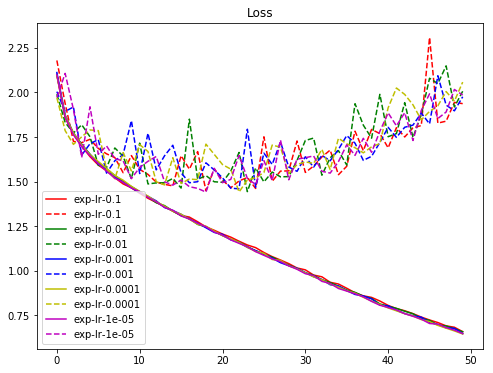

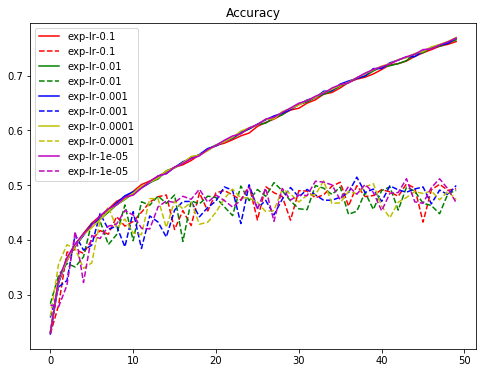

In [13]:

import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k","r", "g", "b", "y", "m", "k","r", "g", "b", "y", "m", "k","r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()